In [1]:
# PW4 Exploitation
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
from datetime import datetime
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("beer_reviews.csv")

In [283]:
len(df)

1586614

In [3]:
# Data cleanning
df.loc[df['brewery_id'] == 1193,'brewery_name'] = 'Unknow brewery2'
df.loc[df['brewery_id'] == 27,'brewery_name'] = 'Unknow brewery'
df.loc[df['review_overall'] == 0,'review_overall'] = 1
df.loc[df['review_appearance'] == 0,'review_appearance'] = 1


In [176]:
#df = df.head(1000)

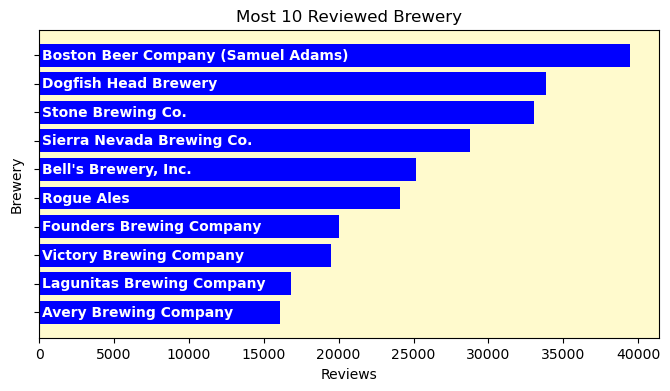

In [3]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(8,4))

df1 = pd.crosstab(df['brewery_name'],  columns=df['review_overall'], values=df['review_overall'], aggfunc=len , margins=True, margins_name='Total')[['Total']].sort_values('Total', ascending=False)[1:11]
df1.reset_index()
#display(df1)
ax1.set_title("Most 10 Reviewed Brewery")
ax1.set_xlabel("Reviews")
ax1.set_ylabel("Brewery")
ax1.set_facecolor('lemonchiffon')
ax1.invert_yaxis()
ax1.set_yticklabels([])
bars = ax1.barh(df1.index,df1['Total'], color='b')
for i, bar in enumerate(bars):
    ax1.text(200, bar.get_y() + bar.get_height()/2, df1.index[i], ha='left', va='center', color='w', fontweight="bold")
plt.show()

review_overall,Total
beer,
90 Minute IPA (Dogfish Head Brewery),3290
Old Rasputin Russian Imperial Stout (North Coast Brewing Co.),3111
Sierra Nevada Celebration Ale (Sierra Nevada Brewing Co.),3000
"Two Hearted Ale (Bell's Brewery, Inc.)",2728
Stone Ruination IPA (Stone Brewing Co.),2704
Arrogant Bastard Ale (Stone Brewing Co.),2704
Sierra Nevada Pale Ale (Sierra Nevada Brewing Co.),2587
Stone IPA (India Pale Ale) (Stone Brewing Co.),2575
Pliny The Elder (Russian River Brewing Company),2527


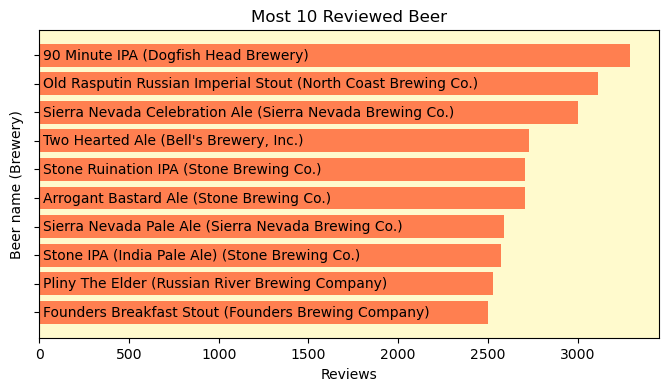

In [4]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(8,4))

df['beer'] = df['beer_name'] + ' ('+ df['brewery_name'] + ')'
df1 = pd.crosstab(df['beer'],  columns=df['review_overall'], values=df['review_overall'], aggfunc=len , margins=True, margins_name='Total')[['Total']].sort_values('Total', ascending=False)[1:11]

df1.reset_index()
display(df1)
ax1.set_title("Most 10 Reviewed Beer")
ax1.set_xlabel("Reviews")
ax1.set_ylabel("Beer name (Brewery)")

ax1.set_facecolor('lemonchiffon')
ax1.invert_yaxis()
ax1.set_yticklabels([])

bars = ax1.barh(df1.index,df1['Total'], color='coral')

# add labels over the bars
for i, bar in enumerate(bars):
    ax1.text(20, bar.get_y() + bar.get_height()/2, df1.index[i], ha='left', va='center')

plt.show()


,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
review_time,1.000000,0.028724,0.067453,0.058233,0.057247,0.044498,0.144885
review_overall,0.028724,1.000000,0.616013,0.501732,0.701914,0.789816,0.138512
review_aroma,0.067453,0.616013,1.000000,0.561029,0.616947,0.716776,0.332570
review_appearance,0.058233,0.501732,0.561029,1.000000,0.566634,0.546980,0.263941
review_palate,0.057247,0.701914,0.616947,0.566634,1.000000,0.734135,0.286711
review_taste,0.044498,0.789816,0.716776,0.546980,0.734135,1.000000,0.290827
beer_abv,0.144885,0.138512,0.332570,0.263941,0.286711,0.290827,1.000000


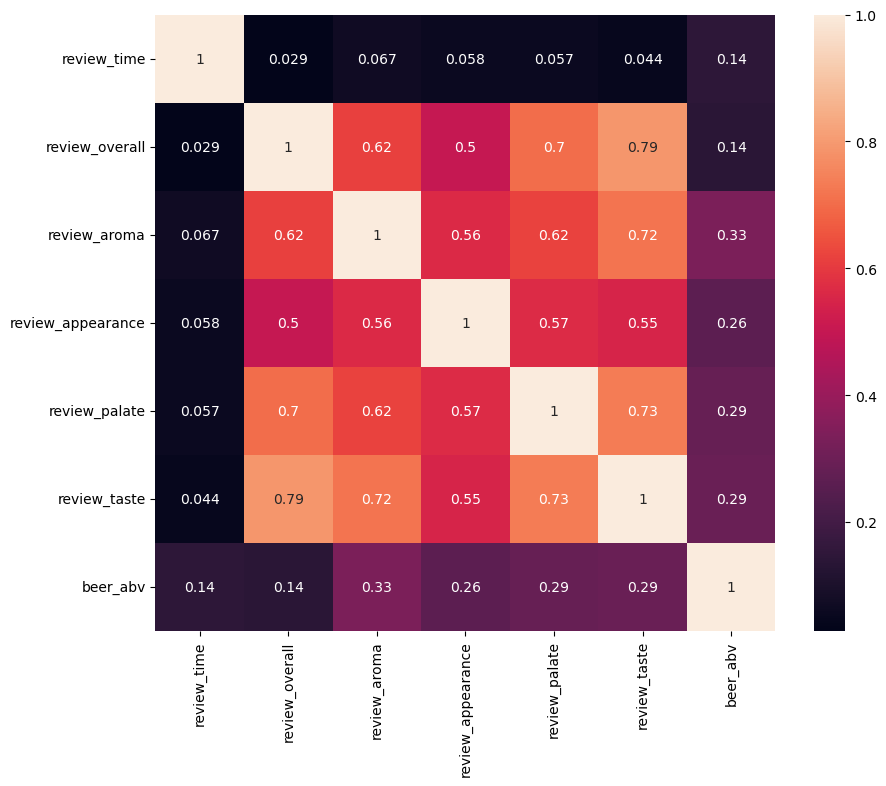

In [5]:
columns = ['review_time','review_overall','review_aroma','review_appearance','review_palate','review_taste','beer_abv']
f, ax = plt.subplots(figsize=(10,8))

cor_fit = df[columns].corr()
display(cor_fit)
sns.heatmap(cor_fit, annot=True);


In [6]:
#Total review by brewery
df1 = pd.crosstab(df['brewery_id'], columns=df['review_overall'], values=df['review_overall'], aggfunc=len, margins=True, margins_name='Total')
df1 = df1.groupby('brewery_id')[['Total']].sum().sort_values('Total', ascending=False)[0:11]
df3 = df[['brewery_id','brewery_name']].drop_duplicates()
df1 = pd.merge(df1,df3,  on='brewery_id', how='inner').set_index('brewery_name')

display(df1)

c:\Users\romai\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)


,brewery_id,Total
brewery_name,,
Boston Beer Company (Samuel Adams),35,39444
Dogfish Head Brewery,10099,33839
Stone Brewing Co.,147,33066
Sierra Nevada Brewing Co.,140,28751
"Bell's Brewery, Inc.",287,25191
Rogue Ales,132,24083
Founders Brewing Company,1199,20004
Victory Brewing Company,345,19479
Lagunitas Brewing Company,220,16837


In [7]:
  

df1= df.loc[df['brewery_id'] == 287,('brewery_id','brewery_name','beer_beerid','beer_name','review_time','review_overall','review_aroma','review_appearance','review_palate','review_taste')]
#display(df1)
#df1 = df1.reset_index()
df2 = df1.groupby(by=['beer_beerid','beer_name'])[['review_time','review_overall','review_aroma','review_appearance','review_palate','review_taste']].agg({'review_time':'count','review_overall':np.mean,'review_aroma':np.mean,'review_appearance':np.mean,'review_palate':np.mean,'review_taste':np.mean})

df2 = df2.sort_values('review_time', ascending=False)[:5]
df2 = df2.reset_index()
display(df2)

MyDic={}
MyDic = df2.to_dict()
print(MyDic)






,beer_beerid,beer_name,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste
0,1093,Two Hearted Ale,2728,4.329729,4.266496,4.153959,4.138746,4.318915
1,17112,Bell's Hopslam Ale,2443,4.377609,4.533156,4.242530,4.314368,4.518420
2,1444,Bell's Expedition Stout,1692,3.953605,4.151596,4.269799,4.214539,4.237589
3,1094,Bell's Oberon Ale,1440,4.074306,3.648611,3.815278,3.845139,3.868750
4,1117,Bell's Kalamazoo Stout,1287,4.057498,3.951437,4.173271,4.043901,4.120047


{'beer_beerid': {0: 1093, 1: 17112, 2: 1444, 3: 1094, 4: 1117}, 'beer_name': {0: 'Two Hearted Ale', 1: "Bell's Hopslam Ale", 2: "Bell's Expedition Stout", 3: "Bell's Oberon Ale", 4: "Bell's Kalamazoo Stout"}, 'review_time': {0: 2728, 1: 2443, 2: 1692, 3: 1440, 4: 1287}, 'review_overall': {0: 4.329728739002933, 1: 4.377609496520671, 2: 3.9536052009456264, 3: 4.074305555555555, 4: 4.057498057498058}, 'review_aroma': {0: 4.266495601173021, 1: 4.533155955792059, 2: 4.151595744680851, 3: 3.6486111111111112, 4: 3.9514374514374513}, 'review_appearance': {0: 4.153958944281525, 1: 4.242529676627098, 2: 4.2697990543735225, 3: 3.8152777777777778, 4: 4.173271173271173}, 'review_palate': {0: 4.13874633431085, 1: 4.314367580843226, 2: 4.214539007092198, 3: 3.845138888888889, 4: 4.043900543900544}, 'review_taste': {0: 4.318914956011731, 1: 4.5184199754400325, 2: 4.23758865248227, 3: 3.86875, 4: 4.12004662004662}}


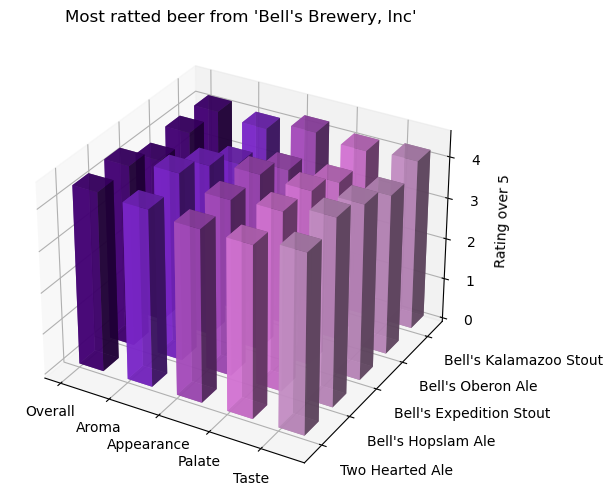

In [8]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
colors = ['indigo', 'blueviolet', 'mediumorchid','violet', 'plum']

x = np.arange(5)
y = np.arange(len(df2))
X, Y = np.meshgrid(x, y)
Z = np.zeros((5, len(df2)))

for i, beer in enumerate(df2.beer_name):
    for j, rating_type in enumerate(['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste']):
        Z[j, i] = df2[rating_type][i]


for i in range(len(y)):
    for j in range(len(x)):
        ax.bar3d(x[j], i, 0, 0.5, 0.5, Z[j, i], color=colors[j], alpha=0.8)

ax.set_yticks(y)
ax.set_yticklabels(df2.beer_name, ha='left')
ax.set_ylim3d(-0.5, len(df2)-0.5)  # Add this line to fix the offset
ax.set_xticks(x)
ax.set_xticklabels(['Overall', 'Aroma', 'Appearance', 'Palate', 'Taste'])
ax.set_zlabel('Rating over 5')
ax.set_title("Most ratted beer from 'Bell's Brewery, Inc'")

plt.show()

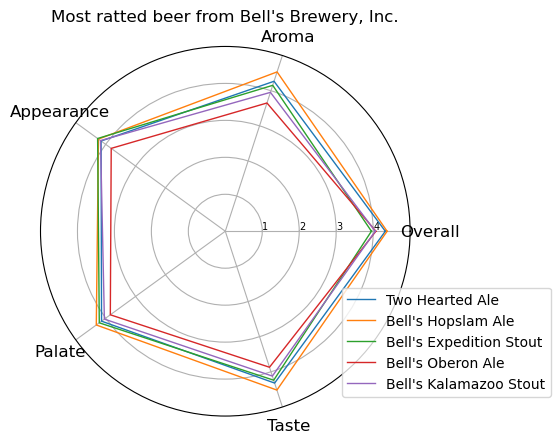

In [9]:
from math import pi
brewery = 287
#selecting brewery rows
df1= df.loc[df['brewery_id'] == brewery,('brewery_id','brewery_name','beer_beerid','beer_name','review_time','review_overall','review_aroma','review_appearance','review_palate','review_taste')]
#catching the name
breweryName = df1['brewery_name'].iloc[0]

df2 = df1.groupby(by=['beer_beerid','beer_name'])[['review_time','review_overall','review_aroma','review_appearance','review_palate','review_taste']].agg({'review_time':'count','review_overall':np.mean,'review_aroma':np.mean,'review_appearance':np.mean,'review_palate':np.mean,'review_taste':np.mean})
df2 = df2.sort_values('review_time', ascending=False)[:5]

df2=df2[['review_overall','review_aroma','review_appearance','review_palate','review_taste']]
df2 = df2.reset_index()
#display(df2)


# number of variable
categories=list(df2)[2:]
categories = [s[7:].capitalize() for s in categories]
#print('categories',categories)
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
#print('angles',angles)

# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='black', size=12)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1,2,3,4], ["1","2","3","4"], color="black", size=7)
plt.ylim(0,5)

legends= []


for i in range(0,len(df2['beer_beerid'])):
    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values=df2.loc[i].drop('beer_beerid').values.flatten().tolist()
    #print('values[0]',values[0])
    legends.append(values[0])
    values = values[1:]
    values += values[:1]
    #print('values slice',values)
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    

#legend
plt.legend(legends, loc=5, bbox_to_anchor=(1.4, 0.2, 0, 0) )
ax.set_title("Most ratted beer from " + breweryName)
# Show the graph
plt.show()

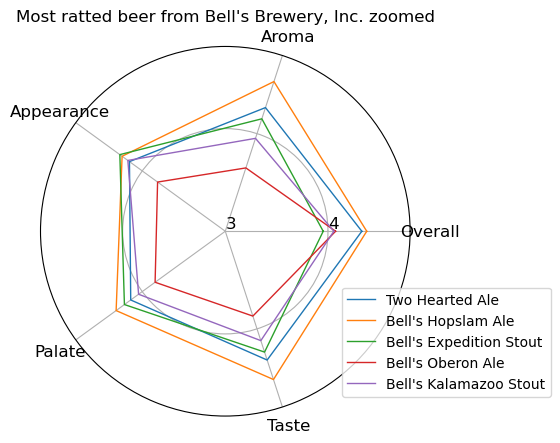

In [10]:
from math import pi
brewery = 287
#selecting brewery rows
df1= df.loc[df['brewery_id'] == brewery,('brewery_id','brewery_name','beer_beerid','beer_name','review_time','review_overall','review_aroma','review_appearance','review_palate','review_taste')]
#catching the name
breweryName = df1['brewery_name'].iloc[0]

df2 = df1.groupby(by=['beer_beerid','beer_name'])[['review_time','review_overall','review_aroma','review_appearance','review_palate','review_taste']].agg({'review_time':'count','review_overall':np.mean,'review_aroma':np.mean,'review_appearance':np.mean,'review_palate':np.mean,'review_taste':np.mean})
df2 = df2.sort_values('review_time', ascending=False)[:5]

df2=df2[['review_overall','review_aroma','review_appearance','review_palate','review_taste']]
df2 = df2.reset_index()
#display(df2)


# number of variable
categories=list(df2)[2:]
categories = [s[7:].capitalize() for s in categories]
#print('categories',categories)
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
#print('angles',angles)

# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='black', size=12)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1,2,3,4], ["1","2","3","4"], color="black", size=12)
plt.ylim(0,5)

legends= []


for i in range(0,len(df2['beer_beerid'])):
    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values=df2.loc[i].drop('beer_beerid').values.flatten().tolist()
    #print('values[0]',values[0])
    legends.append(values[0])
    values = values[1:]
    values += values[:1]
    #print('values slice',values)
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    
plt.ylim(3,4.8)

#legend
plt.legend(legends, loc=5, bbox_to_anchor=(1.4, 0.2, 0, 0) )
ax.set_title("Most ratted beer from " + breweryName + " zoomed")
# Show the graph
plt.show()

In [11]:
pd.crosstab(df['beer_beerid'],  columns=df['review_overall'], values=df['review_overall'], aggfunc=np.std, margins=True, margins_name='Total')[['Total']].sort_values('Total', ascending=False)[1:11]

review_overall,Total
beer_beerid,
22410,2.020726
27650,1.973787
63507,1.917029
46442,1.732051
41553,1.732051
47093,1.732051
59955,1.732051
2745,1.732051
13216,1.732051


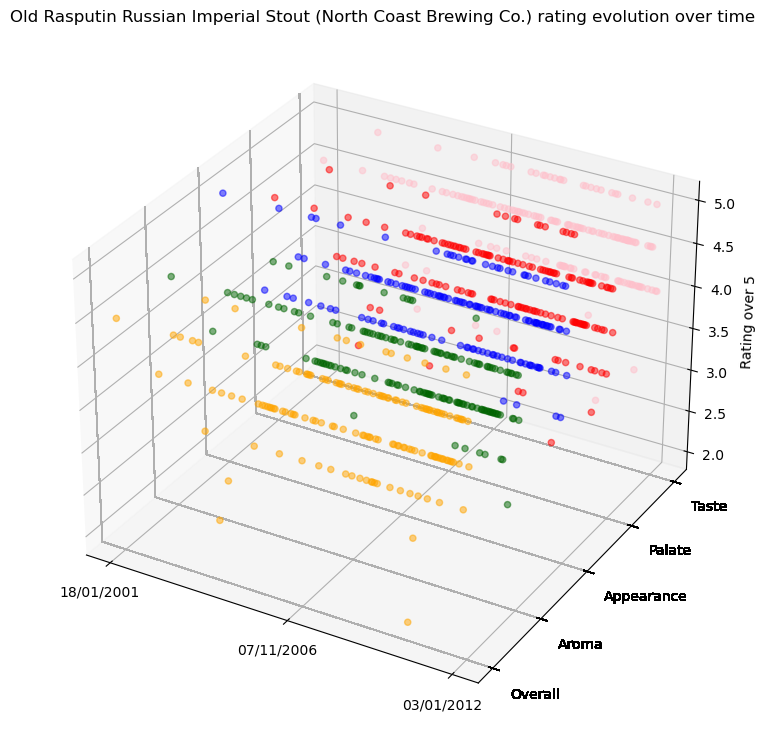

In [12]:
fig = plt.figure(figsize=(9,15))
ax = fig.add_subplot(projection = '3d')

beer = 412
#selecting beer rows
df1= df.loc[df['beer_beerid'] == beer,('beer_beerid','beer_name','beer_style','brewery_name','review_time','review_overall','review_aroma','review_appearance','review_palate','review_taste')]
df1 = df1.sort_values('review_time', ascending=True)
df1 = df1[::20]
#print(len(df1))
#display(df1)
#catching the name
beername = df1[['beer_name','brewery_name']].iloc[0].values.flatten()
beername = beername[0] + ' ('+ beername[1] +')'
#print(beername)

df2 = df1.set_index('review_time').loc[:, 'review_overall':'review_taste'].stack().reset_index()
# Rename the new columns
df2.columns = ['review_time', 'review', 'value']


df2["review_date"] = df2["review_time"].apply(lambda x: datetime.fromtimestamp(x).strftime("%d/%m/%Y"))

review = {'review_overall':1, 'review_aroma':2, 'review_appearance':3, 'review_palate':4, 'review_taste':5}

x = df2['review_time']
y = df2['review'].map(review)
z = df2['value']

#ax.set_xlabel("Bill Length (mm)")
#ax.set_ylabel("Bill Depth (mm)")
#ax.set_zlabel("Body Mass (g)")
colors = {'review_overall':'orange', 'review_aroma':'darkgreen', 'review_appearance':'blue', 'review_palate':'red', 'review_taste':'pink'}
ax.scatter(x, y, z, c=df2['review'].map(colors), alpha=0.5)

ax.set_yticks(y)
ax.set_yticklabels(df2['review'].apply(lambda x: x[7:].capitalize()), ha='left', fontweight='normal')
ax.set_xticks(x)
ax.set_xticklabels(df2["review_date"])

ax.set_xticks([ax.get_xticks()[0],ax.get_xticks()[180],ax.get_xticks()[-1]]) 

ax.set_zlabel('Rating over 5')
ax.set_title(beername + " rating evolution over time")
plt.show()


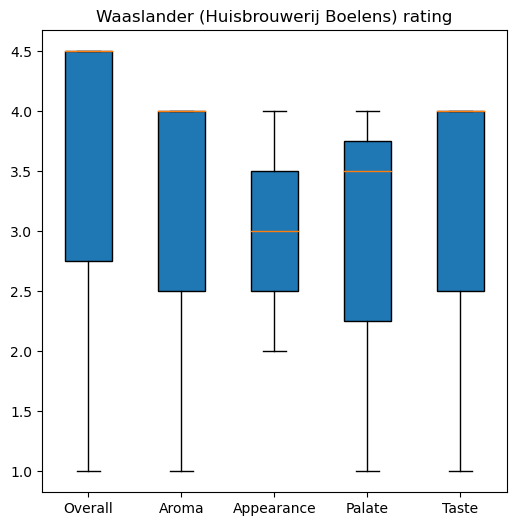

In [14]:


fig, ax1 = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(6,6))
beer = 22410
#selecting beer rows
df1= df.loc[df['beer_beerid'] == beer,('beer_beerid','beer_name','beer_style','brewery_name','review_time','review_overall','review_aroma','review_appearance','review_palate','review_taste')]
beername = df1[['beer_name','brewery_name']].iloc[0].values.flatten()
beername = beername[0] + ' ('+ beername[1] +')'
y=df1[['review_overall','review_aroma','review_appearance','review_palate','review_taste']]
ax1.set_title(beername + " rating")
box = ax1.boxplot(y, patch_artist=True)
ax1.set_xticklabels(['Overall', 'Aroma', 'Appearance', 'Palate', 'Taste'])
plt.show()




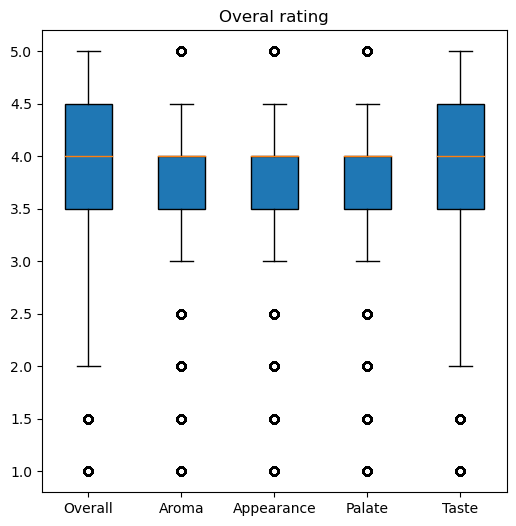

In [254]:


fig, ax1 = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(6,6))
beer = 22410

#selecting beer rows
#df1= df.loc[df['beer_beerid'] == beer,('beer_beerid','beer_name','beer_style','brewery_name','review_time','review_overall','review_aroma','review_appearance','review_palate','review_taste')]
beername = df[['beer_name','brewery_name']].iloc[0].values.flatten()
beername = beername[0] + ' ('+ beername[1] +')'
y=df[['review_overall','review_aroma','review_appearance','review_palate','review_taste']]
ax1.set_title("Overal rating")
box = ax1.boxplot(y, patch_artist=True)
ax1.set_xticklabels(['Overall', 'Aroma', 'Appearance', 'Palate', 'Taste'])
plt.show()




,beer_beerid,beer_name,review_overall,review_aroma,review_appearance,review_palate,review_taste
0,1093,Two Hearted Ale,4.329729,4.266496,4.153959,4.138746,4.318915
1,17112,Bell's Hopslam Ale,4.377609,4.533156,4.242530,4.314368,4.518420
2,1444,Bell's Expedition Stout,3.953605,4.151596,4.269799,4.214539,4.237589


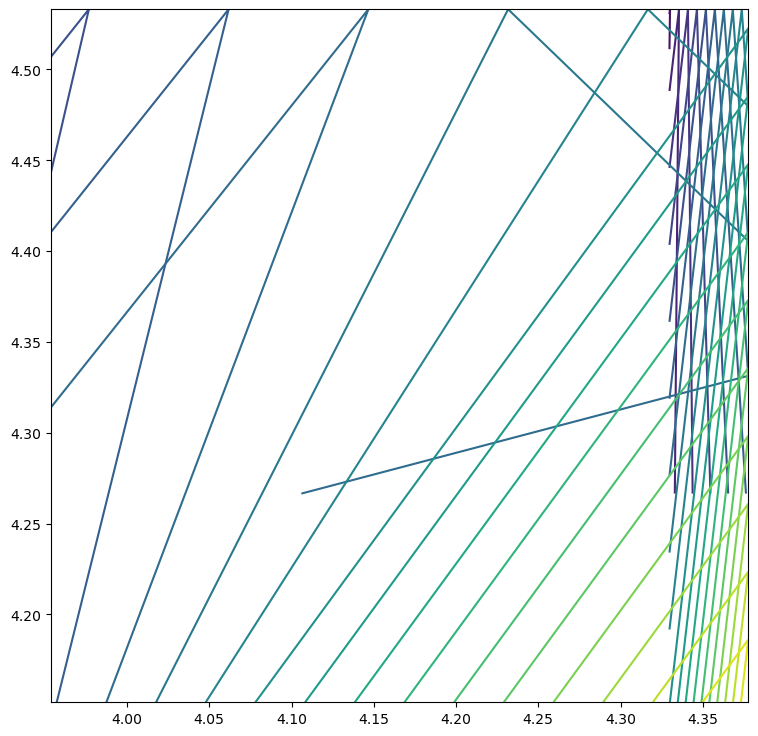

In [266]:
fig = plt.figure(figsize=(9,9))


brewery = 287
#selecting brewery rows
df1= df.loc[df['brewery_id'] == brewery,('brewery_id','brewery_name','beer_beerid','beer_name','review_time','review_overall','review_aroma','review_appearance','review_palate','review_taste')]
#catching the name
breweryName = df1['brewery_name'].iloc[0]

df2 = df1.groupby(by=['beer_beerid','beer_name'])[['review_time','review_overall','review_aroma','review_appearance','review_palate','review_taste']].agg({'review_time':'count','review_overall':np.mean,'review_aroma':np.mean,'review_appearance':np.mean,'review_palate':np.mean,'review_taste':np.mean})
df2 = df2.sort_values('review_time', ascending=False)[:3]

df2=df2[['review_overall','review_aroma','review_appearance','review_palate','review_taste']]
df2 = df2.reset_index()
display(df2)


plt.contour(df2['review_overall'],df2['review_aroma'],[df2['review_appearance'],df2['review_palate'],df2['review_taste']],20)
plt.show()

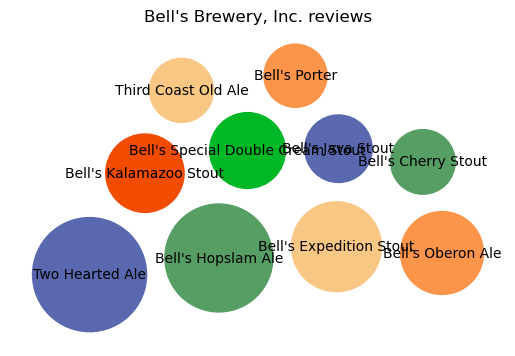

In [285]:
import numpy as np
import matplotlib.pyplot as plt

brewery = 287
#selecting brewery rows
df1= df.loc[df['brewery_id'] == brewery,('brewery_id','brewery_name','beer_beerid','beer_name','review_time','review_overall','review_aroma','review_appearance','review_palate','review_taste')]
#catching the name
breweryName = df1['brewery_name'].iloc[0]
#print(breweryName)

df1 = pd.crosstab(df1['beer_name'],  columns=df1['review_overall'], values=df1['review_overall'], aggfunc='count', margins=True, margins_name='Total')[['Total']].sort_values('Total', ascending=False)[1:11]
df1 = df1.sort_values('Total', ascending=False)
df1 = df1.head(12)
#display(df1)
MyColor= ['#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825','#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825']



class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')


bubble_chart = BubbleChart(area=df1['Total'],
                           bubble_spacing=10)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
bubble_chart.plot(
    ax, df1.index,MyColor)
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title(breweryName +' reviews')

plt.show()

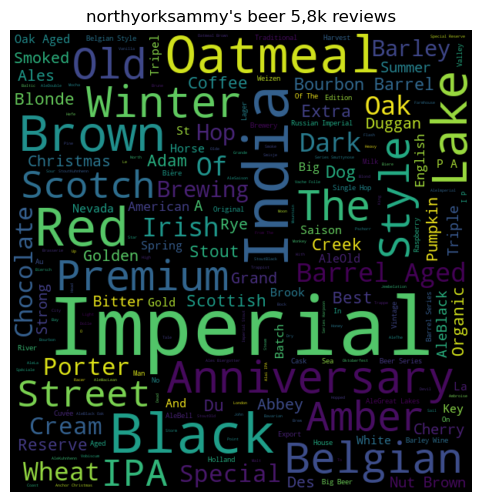

In [291]:
from wordcloud import WordCloud


fig, ax1 = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(6,6))
profilename = 'northyorksammy'
#selecting beer rows
df1= df.loc[df['review_profilename'] == profilename,('review_profilename','beer_beerid','beer_name','beer_style','brewery_name','review_time','review_overall','review_aroma','review_appearance','review_palate','review_taste')]
beername = df1['review_profilename'].head(1)

MyStr = ''
for e in df1['beer_name']:
    MyStr = MyStr + e

noword=['Ale', 'Pale', 'De','Double']

# Create the wordcloud object
wordcloud = WordCloud(width=600, height=600, margin=10, stopwords=noword ).generate(MyStr)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title(profilename + "'s beer 5,8k reviews")

plt.show()



In [290]:
display(df1)

,review_profilename,beer_beerid,beer_name,beer_style,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste
46,northyorksammy,58046,Rauch Ür Bock,Rauchbier,Caldera Brewing Company,1302401846,4.0,4.0,3.5,4.0,4.0
374,northyorksammy,10784,Caldera IPA,American IPA,Caldera Brewing Company,1286137884,3.5,3.5,3.5,3.5,3.5
1499,northyorksammy,1414,Amstel Lager,Euro Pale Lager,Amstel Brouwerij B. V.,1221688593,1.0,3.0,3.0,1.5,1.5
1789,northyorksammy,19558,Wild Wacky Wit,Witbier,Moon River Brewing Company,1202616505,2.5,3.0,4.0,4.0,3.5
1836,northyorksammy,2780,The Captain's Porter,American Porter,Moon River Brewing Company,1202617946,3.5,4.0,4.0,3.5,3.5
...,...,...,...,...,...,...,...,...,...,...,...
1585999,northyorksammy,25095,Drake's 1500 Pale Ale,American Pale Ale (APA),Drake's Brewing Co.,1275194168,4.0,4.0,3.5,4.0,4.0
1586287,northyorksammy,73458,Junction Craft Conductors Craft Ale,American Amber / Red Ale,Junction Craft Brewing,1316989528,3.0,2.5,4.0,3.5,3.5
1586464,northyorksammy,43008,Belgian Tripel,Tripel,The Defiant Brewing Company,1212359317,4.5,4.0,3.5,3.5,4.0
1586511,northyorksammy,34404,Four Horsemen #2: War,American Stout,The Defiant Brewing Company,1212358735,4.5,4.0,3.5,4.0,4.5


In [52]:
df

,index,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,163,Amstel Brouwerij B. V.,1262747638,4.0,2.0,2.0,realbama,Light Lager,2.0,3.0,Amstel Light,3.5,436
996,996,163,Amstel Brouwerij B. V.,1261933783,3.0,3.0,2.0,heissebier,Light Lager,2.5,2.5,Amstel Light,3.5,436
997,997,163,Amstel Brouwerij B. V.,1258997318,3.0,2.0,2.5,rfgetz,Light Lager,3.0,2.5,Amstel Light,3.5,436
998,998,163,Amstel Brouwerij B. V.,1258683176,3.5,3.0,2.0,HalfFull,Light Lager,2.0,2.0,Amstel Light,3.5,436
